## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
'''
 Predizione del tipo di frutto a partire da immagini

 Dataset:
 Train
    apple
    cherry
    strawberry
    tomato
 Test 
    apple
    cherry
    strawberry
    tomato
 (Immagini prese da google images)   

la rete neurale utilizzata è resnet50 (un classificatore CNN)
Non si addestrerà una rete da 0 ma useremo le tecniche di 
Transfer-Learning.
resnet50 è uno degli algoritmi all'attuale stato dell'arte usato
nella classificazione di oggetti diversi a partire da immagini.
Adatteremo questo modello al nostro task con il
transfer-learning.

ImageDateGenerator permette di creare data augmentation e nuove 
modded images

Matplotlib è usata trivialmente per plottare grafici
'''

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
'''
 IMAGE_SIZE setta tutte le immagini ad una certa dimesione
'''
IMAGE_SIZE = [224, 224]
'''
 Salvo i path di training e test set
'''
train_path = 'FruitsDataset\train'
valid_path = 'FruitsDataset\test'


In [3]:
'''
 Inizializzo ResNet50 con l'IMAGE-SIZE + [3] (che significa in 3 channel RGB)
 Come pesi si usa 'imagenet' perschè sono i pesi che sono stati usati nel training
 iniziale della rete.
 include_top = False perchè si hanno solo 4 categorie e quindi dovremo creare un last e un 
 top layer adeguato
'''
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#resnet.summary


In [4]:
'''
 Questa impostazione serve per imporre che i layers presenti in resnet non vengano
 ritrainati di nuovo
'''
for layer in resnet.layers:
    layer.trainable = False

In [5]:
'''
 Questa istruzione permette di capire quante cartelle sono presenti in train e quindi
 di ritenere quante categorie sono necessarie  
'''
folders = glob('FruitsDataset\Train\*')
#folders

In [6]:
'''
 Flatteining della rete neurale mediante la funzione Flatten()
'''
x = Flatten()(resnet.output)

In [7]:
'''
 Imposto il numero degli output a len(folders) che è 4 e la funzione di attivazione a softmax
'''
prediction = Dense(len(folders), activation='softmax')(x)
'''
 Creo il modello
'''
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

'''
Osservando la struttura del modello si mota che ora l'ultimo layer ha solo 5 nodi ed è flatten
'''
#model.summary()


"\nOsservando la struttura del modello si mota che ora l'ultimo layer ha solo 5 nodi ed è flatten\n"

In [9]:
'''
 Creata la rete neurale compiliamo il modello settando 
 come funzione di loss la categorial_crossentropy,
 adam come optimizer e come metrica di test l'accuracy
'''
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
'''
 Carichiamo tutte le immagini dalle cartelle e faremo dataAugmentation
 per incrementare il numero delle immagini creando nuove immagini usando
 ImageDataGenerator. Per creare queste immagini la funzione farà appunto 
 data augmentation quindi incremento e decremento delle dimensione, flipping
 rotazioni traslazioni eccetera.
 Per fare dataAugmentation è sempre consigliabile riscalare il range le immagini 
 (dividendo la scelta di colori per ogni pixel in 255 colori)
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

'''
 Nota: nel test set non dovremo mai fare della data aumenentation ma
       è consigliabile lasciere le immagini così come sono al più effettuare
       il rescaling per avere una scaling comparabile con quello del training set
'''
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
'''
 Prepariamo il training set mediante la funzione flow_from_directory
 a partire dal train_datagen applicando la data_agumantation, 
 settando le dimensioni correte impostate inizialmente, un batch_size 
 a 32 e dato che abbiamo PIU' di 2 classi la class_mode viene settata 
 a 'categorical' (se solo 2 'binary')
 Nota: Il bastch_size serve per definire la dimensione del batch durante
       le operazioni di calcolo della loss e backpropagation in modo da
       non avere un batch troppo grande e saturare la RAM
'''
training_set = train_datagen.flow_from_directory('FruitsDataset\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 80 images belonging to 4 classes.


In [12]:
'''
 Stessa operazione fatta per il test_set
'''
test_set = test_datagen.flow_from_directory('FruitsDataset\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 40 images belonging to 4 classes.


In [13]:
'''
 Abbiamo tutto ciò che serve per effettuare il fitting del modello:
 training_set,
 validation_set
 gli step per epoca sono dati dalla lunghezza del traing_set (100)
 una durata di allenamento di 35 epoche
 
 Alla 50esma epoca arriviamo a circa il 90-95% di accuracy sul training_set
 e 70-75% di accuracy per il test_set
'''
r = model.fit(
  training_set,
  validation_data=test_set,
  steps_per_epoch=len(training_set),
  epochs=40
)

Epoch 1/40
3/3 [==============================] - 6s 2s/step - loss: 7.5550 - accuracy: 0.2375 - val_loss: 14.0884 - val_accuracy: 0.2500
Epoch 2/40
3/3 [==============================] - 4s 1s/step - loss: 10.9784 - accuracy: 0.2875 - val_loss: 5.6368 - val_accuracy: 0.2500
Epoch 3/40
3/3 [==============================] - 4s 1s/step - loss: 4.9655 - accuracy: 0.3000 - val_loss: 6.8196 - val_accuracy: 0.2500
Epoch 4/40
3/3 [==============================] - 4s 1s/step - loss: 5.4232 - accuracy: 0.3625 - val_loss: 3.2388 - val_accuracy: 0.3000
Epoch 5/40
3/3 [==============================] - 4s 1s/step - loss: 1.9664 - accuracy: 0.4875 - val_loss: 3.2762 - val_accuracy: 0.4000
Epoch 6/40
3/3 [==============================] - 4s 1s/step - loss: 3.3924 - accuracy: 0.4625 - val_loss: 2.6418 - val_accuracy: 0.4750
Epoch 7/40
3/3 [==============================] - 4s 1s/step - loss: 1.7235 - accuracy: 0.5375 - val_loss: 3.0860 - val_accuracy: 0.3000
Epoch 8/40
3/3 [=======================

In [14]:
'''
 Per avere ulteriori imformazioni per ogni epoca
'''
#r.history

'\n Per avere ulteriori imformazioni per ogni epoca\n'

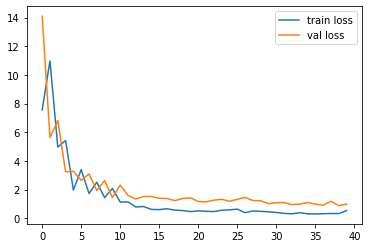

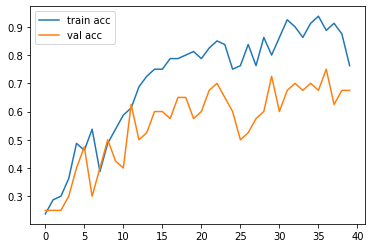

<Figure size 432x288 with 0 Axes>

In [15]:
'''
 Stampo a schermo il grafico della validation e training 
 loss nel corso delle varie epoche
'''
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

'''
 Stampo a schermo il grafico della validation e training 
 accuracy nel corso delle varie epoche
'''
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
'''
 Salviamo il modello mediante la funzione .save col nome
 'model_resnet50.h5'
 H5 è un formato per gli Hieratical Data e contiene arrays
 multidimensionali di dati scientifici
'''
from tensorflow.keras.models import load_model

model.save('red_fruits_model_resnet50.h5')

c:\Users\Gin\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [17]:
'''
 Effettuiamo ora le predizioni sul test_set
'''
y_pred = model.predict(test_set)


In [19]:
'''
 Nella matrice sottostance vi sono per ogni riga un array con la 
 probabilità per ogni classe (l'ordine è dato dalla lettera iniziale
 delle cartelle che definiscono le classi).
'''
#y_pred

"\n Nella matrice sottostance vi sono per ogni riga un array con la \n probabilità per ogni classe (l'ordine è dato dalla lettera iniziale\n delle cartelle che definiscono le classi).\n"

In [20]:
'''
 Verrà selezionata per ogni predizione la classe col valore di probabilità più alto.
'''
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
'''
 Stampo il risultato finale per ogni immagine presente nel test_set
'''
y_pred

array([1, 0, 1, 2, 2, 2, 0, 3, 2, 0, 3, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1,
       1, 2, 3, 2, 3, 0, 1, 2, 1, 3, 1, 0, 2, 2, 2, 0, 1, 1], dtype=int64)

In [22]:
'''
 Il prossimo passo sarà effetturare delle predizioni per un nuovo 
 dataset.
 Carichiamo da keras le librerie per caricare l'immagine
'''
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
'''
 Quindi selezioniamo 'unimmagine dando il target_size prescelto 224x224
'''
img = image.load_img("TestImage/cherry.jpg", target_size=(224,224))



FileNotFoundError: [Errno 2] No such file or directory: 'TestImage/cherry_0.jpg'

In [30]:
'''
 E convertiamo quest'immagine in un array
'''
x = image.img_to_array(img)
#x
''' 
 Volendo si può controllare lo shape che dovrà essere
 224, 224, 3 (misure + 3 canali perchè RBG)
'''
#x.shape
'''
 Effettuo un rescaling come fatto col training e test set
'''
x = x/255
'''
 Si espanderanno poi le dimensioni dell'immagine (1, 224, 224, 3)
'''
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
#img_data.shape

In [31]:
'''
 Ricarico il modello, step necessario se si è già allenato 
 ed è presente nella cartella del progetto se non si vuole
 riallenare ancora
'''
model=load_model('red_fruits_model_resnet50.h5')

In [26]:
'''
 Provo a fare una predizione in base all'immagine selezionata
'''
model.predict(img_data)

array([[5.71748987e-02, 9.42710042e-01, 1.15137445e-04, 1.42520307e-08]],
      dtype=float32)

In [32]:
'''
 Selezione la classe con probabilità più alta nell'arrei delle prefizioni
'''
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
'''
 Verifico infine che sia la classe attesa
'''
a==1

array([ True])